**Дескрипторы берутся уже посчитанными, потому что каждый раз считать CDK долго**

In [1]:
WD = '/media/sf_Ubuntu_folder/Descriptors/v5'

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
from rdkit.Chem import Draw

# Загружаем предварительно сгенерированные датасеты

## Подгружаем датафрейм с дескрипторами из CDK

In [3]:
# Отобранные заранее дескрипторы:
CDK_desc =  ['topoShape',
             #'FMF'
            ]

In [4]:
#подгружаем датафрейм с дескрипторами из CDK
CDK_desc_matrix = pd.read_csv(WD + '/CDK_desc_matrix.csv')
CDK_desc_matrix.drop('Unnamed: 0', axis=1, inplace = True)

#удаляем все дескрипторы, кроме нужных + данных о лиганде
ligang_info_col = ['ligand', 'pK_AD42', 'pK_ref', 'pK_Vina']
drop_list = CDK_desc_matrix.drop(CDK_desc, axis=1).drop(ligang_info_col, axis=1).columns.to_list()
CDK_desc_matrix.drop(drop_list, axis=1, inplace = True)

#выводим полученный датафрейм
CDK_desc_matrix

,topoShape,ligand,pK_AD42,pK_ref,pK_Vina
0,0.857143,1a30_ligand,2.64348,4.30,3.664707
1,0.666667,1c5z_ligand,3.65000,4.01,3.877962
2,1.000000,1bcu_ligand,2.92412,3.28,4.952896
3,0.875000,1bzc_ligand,9.05433,4.92,6.335029
4,0.888889,1eby_ligand,12.61990,9.70,8.599751
...,...,...,...,...,...
266,0.900000,4w9l_ligand,7.12867,5.02,5.860418
267,0.857143,5aba_ligand,4.33109,2.98,3.802559
268,0.500000,5c28_ligand,2.23490,5.66,4.204553
269,1.000000,5dwr_ligand,7.91584,11.22,7.701151


## Подгружаем датафрейм с дескрипторами из RDK

In [5]:
# Отобранные заранее дескрипторы:
RDK_desc = [#'qed',
            'MaxPartialCharge',
            'MinPartialCharge',
            'FractionCSP3',
            'HeavyAtomCount',
            'MolLogP',
            #'TPSA'
           ]

In [6]:
#подгружаем датафрейм с дескрипторами из CDK
RDK_desc_matrix = pd.read_csv(WD + '/RDK_desc_matrix.csv')
RDK_desc_matrix.drop('Unnamed: 0', axis=1, inplace = True)

#удаляем все дескрипторы, кроме нужных + данных о лиганде
ligang_info_col = ['ligand']
drop_list = RDK_desc_matrix.drop(RDK_desc, axis=1).drop(ligang_info_col, axis=1).columns.to_list()
RDK_desc_matrix.drop(drop_list, axis=1, inplace = True)

#выводим полученный датафрейм
RDK_desc_matrix

,MaxPartialCharge,MinPartialCharge,FractionCSP3,HeavyAtomCount,MolLogP,ligand
0,0.278328,-0.550167,0.666667,26,-5.96740,1a30_ligand
1,0.270171,-0.287040,0.000000,9,-0.84900,1c5z_ligand
2,0.072973,-0.398665,0.000000,16,2.55240,1bcu_ligand
3,0.528432,-0.604259,0.235294,29,-0.01320,1bzc_ligand
4,0.252043,-0.390275,0.315789,48,2.42800,1eby_ligand
...,...,...,...,...,...,...
266,0.245968,-0.391185,0.566667,41,2.77822,4w9l_ligand
267,0.138194,-0.506247,0.647059,23,0.39500,5aba_ligand
268,0.137312,-0.383323,0.500000,12,1.89802,5c28_ligand
269,0.273831,-0.355104,0.291667,32,4.32730,5dwr_ligand


## Собираем итоговый датасет из двух подгруженных

In [7]:
desc_matrix = CDK_desc_matrix.merge(RDK_desc_matrix, on = 'ligand')
desc_matrix.drop(['pK_AD42', 'pK_ref', 'pK_Vina'] , axis = 1, inplace = True)
desc_matrix

,topoShape,ligand,MaxPartialCharge,MinPartialCharge,FractionCSP3,HeavyAtomCount,MolLogP
0,0.857143,1a30_ligand,0.278328,-0.550167,0.666667,26,-5.96740
1,0.666667,1c5z_ligand,0.270171,-0.287040,0.000000,9,-0.84900
2,1.000000,1bcu_ligand,0.072973,-0.398665,0.000000,16,2.55240
3,0.875000,1bzc_ligand,0.528432,-0.604259,0.235294,29,-0.01320
4,0.888889,1eby_ligand,0.252043,-0.390275,0.315789,48,2.42800
...,...,...,...,...,...,...,...
266,0.900000,4w9l_ligand,0.245968,-0.391185,0.566667,41,2.77822
267,0.857143,5aba_ligand,0.138194,-0.506247,0.647059,23,0.39500
268,0.500000,5c28_ligand,0.137312,-0.383323,0.500000,12,1.89802
269,1.000000,5dwr_ligand,0.273831,-0.355104,0.291667,32,4.32730


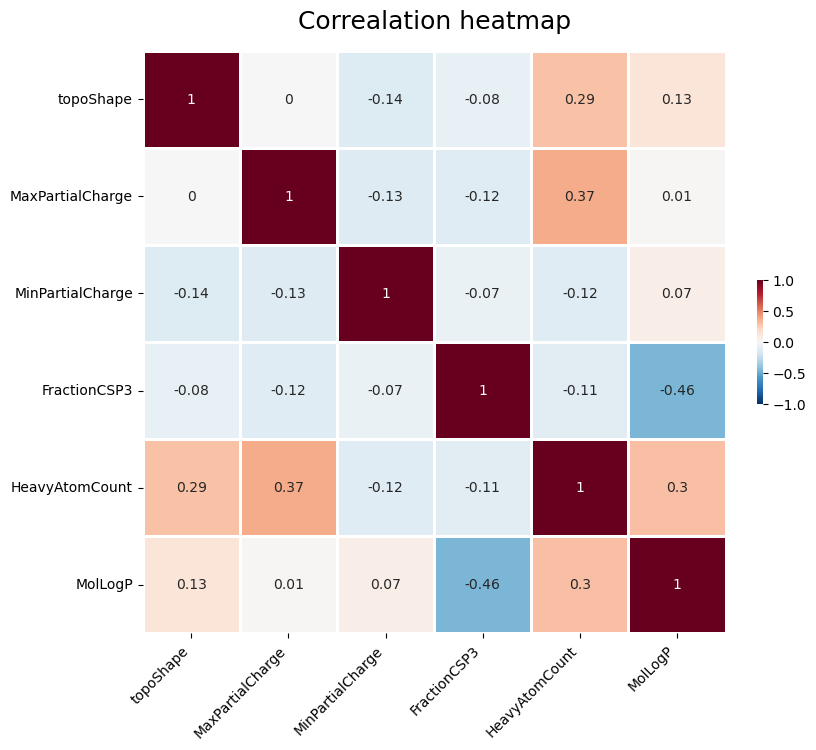

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

ligang_info_col = ['ligand']

heatmap = sns.heatmap(
    desc_matrix.drop(ligang_info_col, axis=1).corr(method="pearson", numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Correalation heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

## Создаем датафрейм активностей

In [9]:
import os

scores_files = os.listdir('CASF-2016-scores')
scores_files.remove('ref_scores.txt')

act_list = pd.read_csv('CASF-2016-scores/ref_scores.txt', sep="\t")
act_list.rename(columns  = {'Ligand': 'ligand',
                            'pK': 'pK(ref)'},
                inplace = True)
act_list.drop('Protein', axis = 1, inplace = True)


for file_name in scores_files:
    #print(file_name)
    tmp_list = pd.read_csv('CASF-2016-scores/'+ file_name, sep="\t", index_col = False)
    tmp_list = tmp_list.loc[:, 'Ligand':'Score(pK)']
    
    if 'DSX' in file_name:
        tmp_list['Score(pK)']= tmp_list.apply(lambda x: -x['Score(pK)'], axis=1)
    tmp_list = tmp_list.loc[tmp_list['Score(pK)'] >= 0.0]
    
    tmp_list = tmp_list.rename(columns={'Ligand': 'ligand',
                                        'Score(pK)': f'pK({file_name[:-11]})'})
    tmp_list.reset_index(inplace = True)
    tmp_list.drop('index', axis = 1, inplace = True)
    act_list = act_list.merge(tmp_list, on = 'ligand', how = 'inner')
    #print(tmp_list)
act_list

,ligand,pK(ref),pK(AutoDockVina),pK(dSAS),pK(DSX),pK(AutoDock42),pK(NNScore2),pK(AutoDockVinaXB),pK(deltavina),pK(XScore)
0,4llx_ligand,2.89,3.681921,192.925751,37.870,1.50674,2.867,3.681921,4.44,4.90
1,5c28_ligand,5.66,4.204553,234.226379,57.042,2.23490,4.881,4.204553,5.05,5.37
2,3uuo_ligand,7.96,5.802023,327.654709,85.801,4.05051,5.973,5.802023,7.38,5.87
3,3ui7_ligand,9.00,5.822823,352.826767,93.159,4.03636,6.195,5.822823,7.89,6.06
4,2v00_ligand,3.66,4.934135,236.869370,77.017,3.18416,5.202,4.934135,5.67,5.49
...,...,...,...,...,...,...,...,...,...,...
266,3dxg_ligand,2.40,3.362434,187.111038,75.032,2.25301,4.827,3.362434,3.70,4.66
267,3d6q_ligand,3.76,3.561232,182.119751,66.427,1.73453,2.767,3.561232,3.86,4.85
268,1w4o_ligand,5.22,4.033666,234.558411,91.261,4.32427,4.246,4.033666,4.39,5.34
269,1o0h_ligand,5.92,4.527273,279.616150,98.830,4.33864,5.783,4.527273,5.57,5.39


# Ререссии ref = Lasso(desc) и SF = Lasso(desc)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
import seaborn as sns

def axe_generator(axe, alphas, coefs, score, title, labels):
    
    for i in range(coefs.shape[1]):
        sns.lineplot(x=alphas, y=coefs.T[i], label = labels[i], ax= axe)

    axe2 = axe.twinx()
    sns.scatterplot(x=alphas, y=score, label = 'R2', ax = axe2)
    ab = axe.get_ylim()
    axe2.set_ylim([ab[0]/ab[1], 1])
    
    axe.set_xlabel('Alpha')
    axe.set_ylabel('Coefficient Value')
    axe.set_title(title)
    axe.grid(True)
    axe.legend()
    axe.semilogx()

from sklearn.linear_model import lasso_path
from sklearn.linear_model import Lasso

def Lasso_regressor(X, y):
    alphas, coefs, _ = lasso_path(X, y)
    coefs = np.zeros((len(alphas), X.shape[1]))
    score = np.zeros(len(alphas))
    
    for i in range(len(alphas)):
        alpha = alphas[i]
        model = Lasso(alpha=alpha)
        model.fit(X, y)
        coefs[i] = model.coef_
        score[i] = model.score(X, y)
        
    return alphas, coefs, score

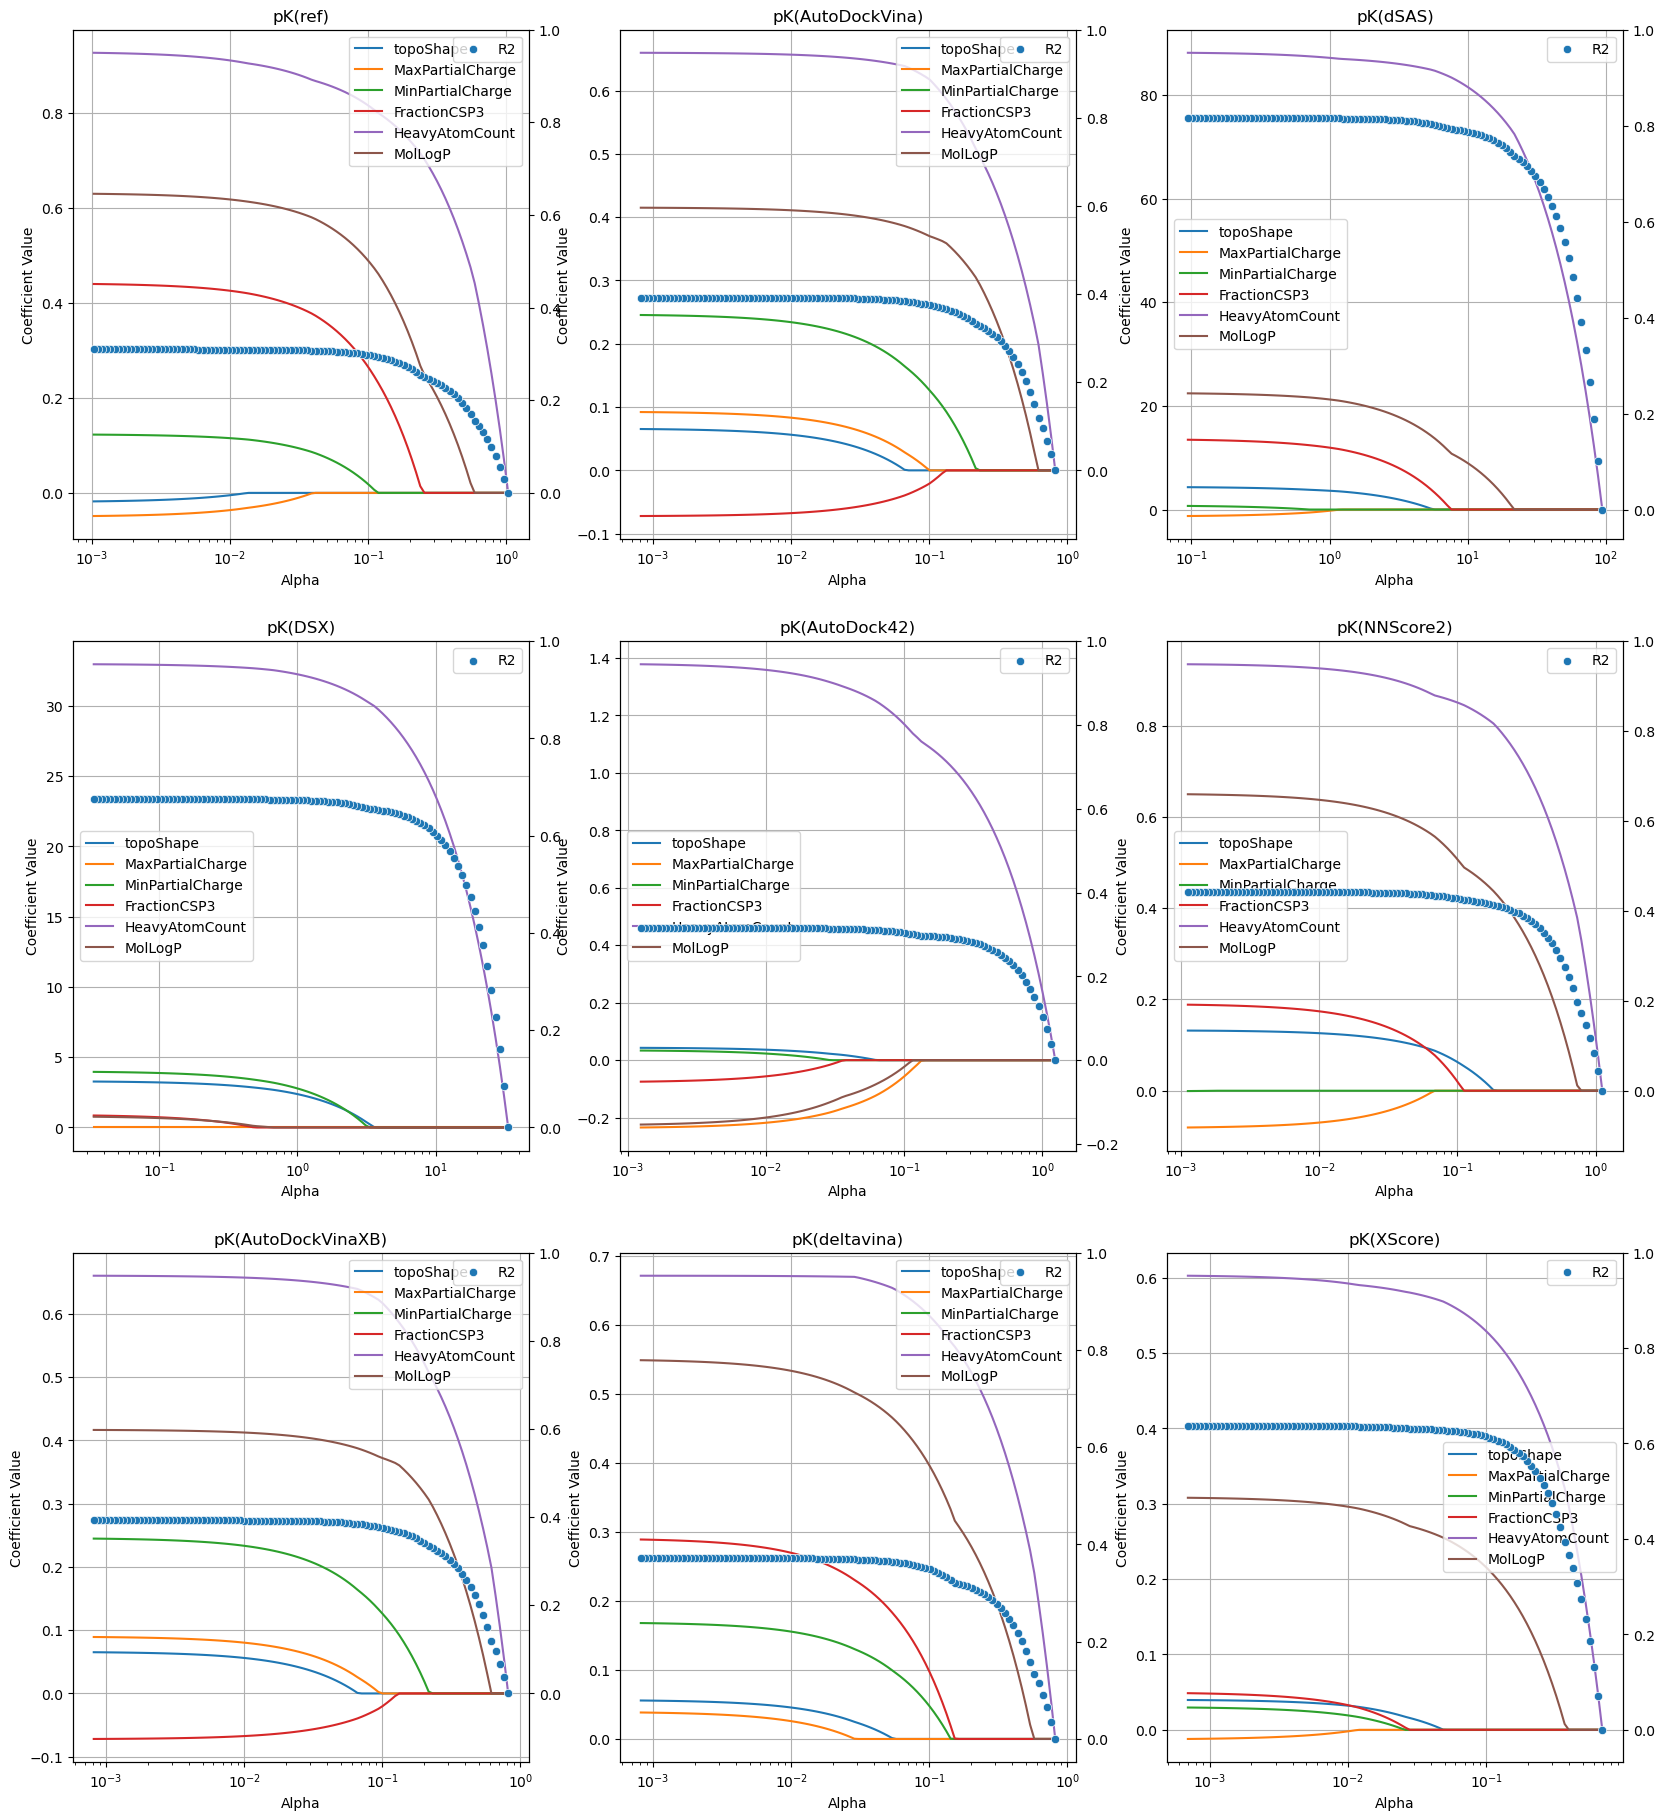

In [12]:
# задаем параметры multiplot
num_of_plots = act_list.shape[1]-1
ncols = 3
nrows = num_of_plots // ncols + (1 if num_of_plots % ncols > 0 else 0)

# создаем multiplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 7.5*nrows))

for j in range(num_of_plots):
    
    #cоздаем датасет, в котором будет y и х
    tmp_x_df = desc_matrix
    tmp_y_df = act_list[['ligand',act_list.columns[j+1]]]
    tmp_df = tmp_x_df.merge(tmp_y_df, on = 'ligand', how = 'inner')
    
    #отбираем текущий y
    y = tmp_df[act_list.columns[j+1]].values
    title = act_list.columns[j+1]
    
    # задаем значения X  
    X = tmp_df.drop(['ligand', title], axis = 1).values
    scaler.fit(X)
    X_scaled = scaler.fit_transform(X)
    
    # проводим Лассо регрессию, находим alphas, coefs и score
    
    alphas, coefs, score = Lasso_regressor(X_scaled, y)
    
    # строим наш график

    axe = axes[j // ncols, j % ncols]
    labels = tmp_df.drop(['ligand', title], axis = 1).columns
    
    axe_generator(axe, alphas, coefs, score, title, labels)

# Регрессии ref = Lasso(SF + desc)

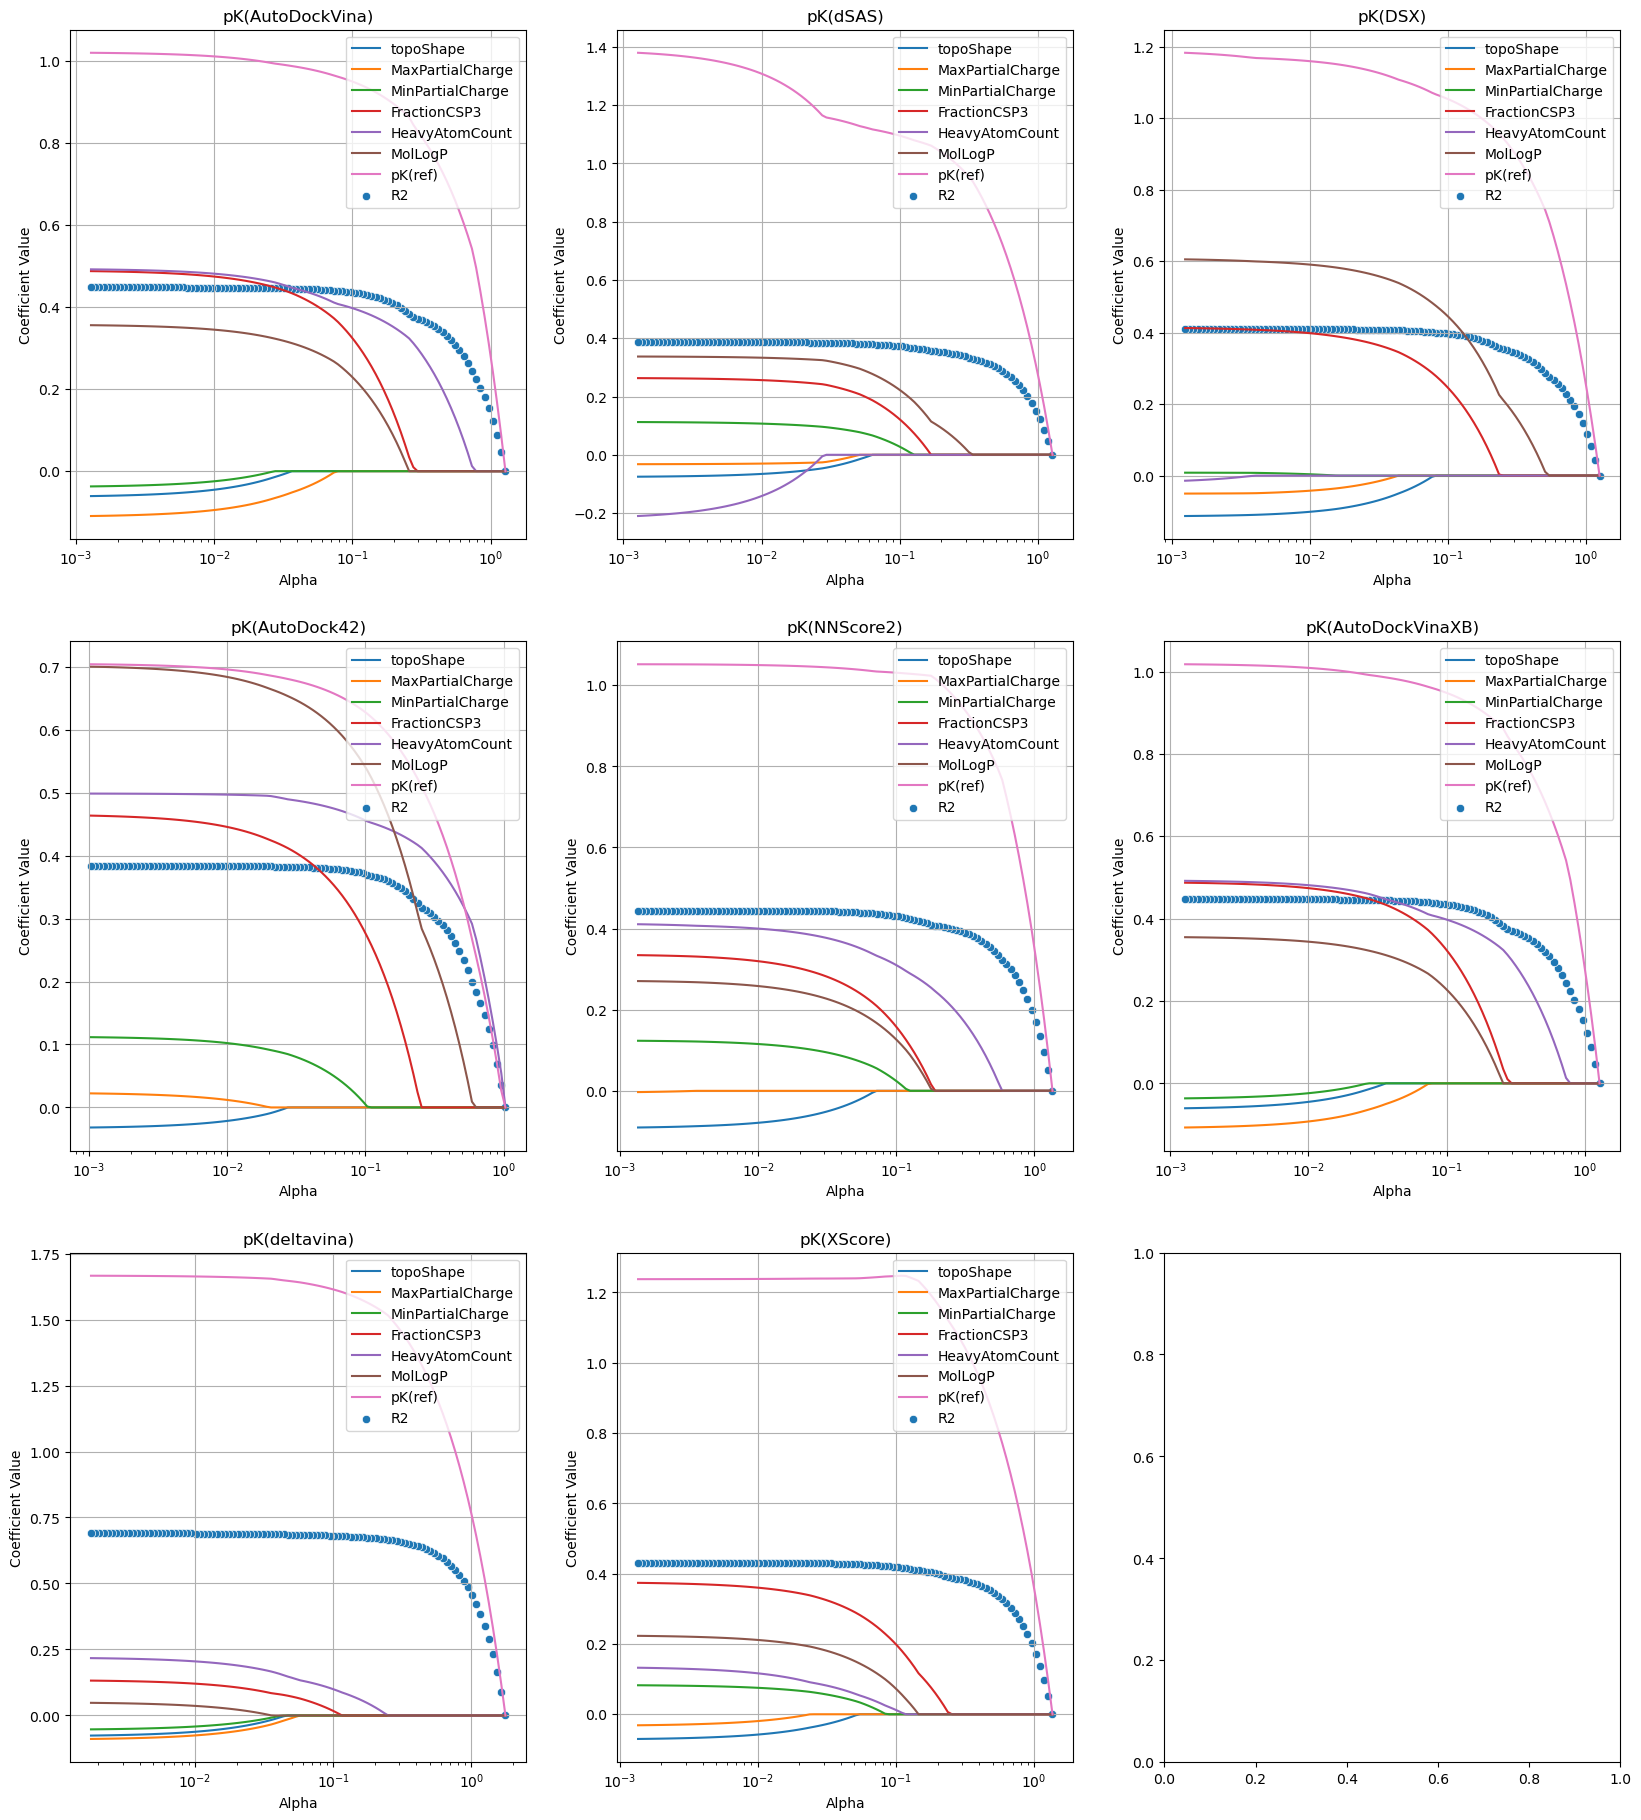

In [337]:
# задаем параметры multiplot
num_of_plots = act_list.shape[1]-2
ncols = 3
nrows = num_of_plots // ncols + (1 if num_of_plots % ncols > 0 else 0)

# создаем multiplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 7.5*nrows))

for j in range(num_of_plots):
    
    #cоздаем датасет, в котором будет y и х   
    tmp_x_df = desc_matrix
    tmp_y_df = act_list[['ligand',act_list.columns[j+2], 'pK(ref)']]
    tmp_df = tmp_x_df.merge(tmp_y_df, on = 'ligand', how = 'inner')
    
    #отбираем текущий y
    y = tmp_df['pK(ref)'].values
    title = act_list.columns[j+2]
    
    # задаем значения X
    X = tmp_df.drop(['ligand', 'pK(ref)'], axis = 1).values
    scaler.fit(X)
    X_scaled = scaler.fit_transform(X)
    
    # проводим Лассо регрессию, находим alphas, coefs и score
    
    alphas, coefs, score = Lasso_regressor(X_scaled, y)
    
    # строим наш график

    axe = axes[j // ncols, j % ncols]
    labels = tmp_df.drop(['ligand', title], axis = 1).columns
    
    axe_generator(axe, alphas, coefs, score, title, labels)

# Регрессии ref_eff = Lasso(desc) и SF_eff = Lasso(desc)

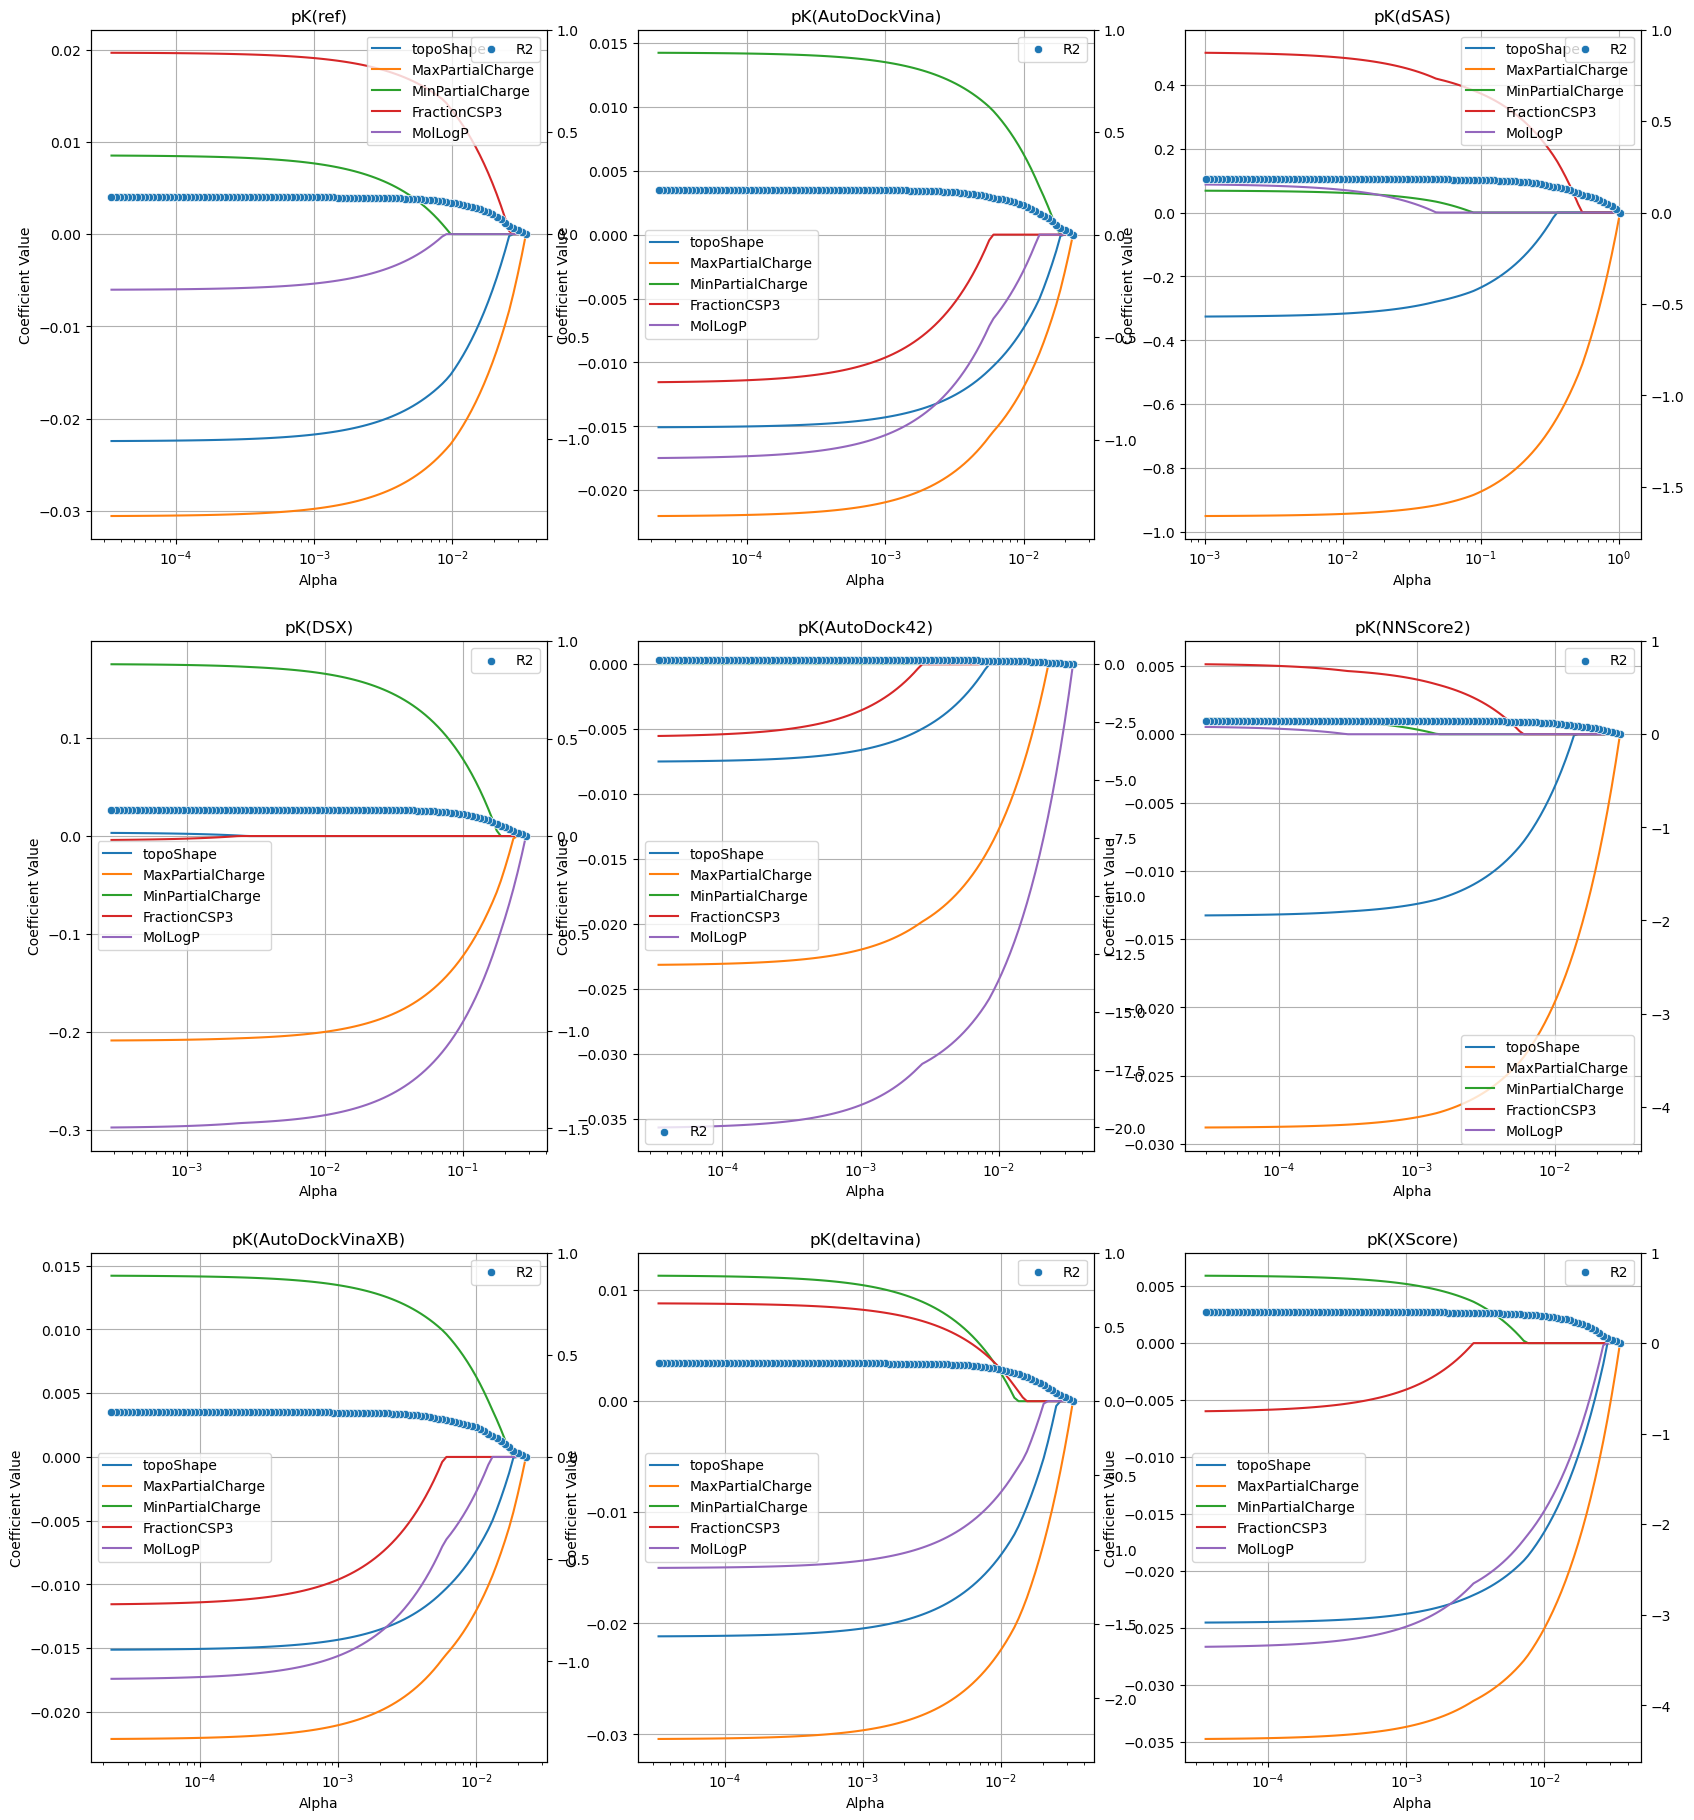

In [350]:
# задаем параметры multiplot
num_of_plots = act_list.shape[1]-1
ncols = 3
nrows = num_of_plots // ncols + (1 if num_of_plots % ncols > 0 else 0)

# создаем multiplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 7.5*nrows))

for j in range(num_of_plots):
    
    #cоздаем датасет, в котором будет y и х
    tmp_x_df = desc_matrix

    SF_score_name = act_list.columns[j+1]
    tmp_y_df = act_list[['ligand', SF_score_name]]
    tmp_df = tmp_x_df.merge(tmp_y_df, on = 'ligand', how = 'inner')
    tmp_df[SF_score_name]= tmp_df.apply(lambda x: x[SF_score_name] / x['HeavyAtomCount'], axis=1)
    
    #отбираем текущий y
    y = tmp_df[act_list.columns[j+1]].values
    title = act_list.columns[j+1]
    
    # задаем значения X  
    X =      tmp_df.drop(['ligand', title, 'HeavyAtomCount'], axis = 1).values
    labels = tmp_df.drop(['ligand', title, 'HeavyAtomCount'], axis = 1).columns
    
    scaler.fit(X)
    X_scaled = scaler.fit_transform(X)
    
    # проводим Лассо регрессию, находим alphas, coefs и score
    alphas, coefs, score = Lasso_regressor(X_scaled, y)
    
    # строим наш график
    axe = axes[j // ncols, j % ncols]
    axe_generator(axe, alphas, coefs, score, title, labels)